# 1.Descriptions

Nghiên cứu này xem xét về béo phì và cách phân loại mức độ béo phì bằng phương pháp học máy.

# 2.Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 3.Preprocessing

In [4]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Gabriel-Duong/UEH-Data-Science/main/playground-series-s4e2%20(1)/train.csv')
df_test_data = pd.read_csv('https://raw.githubusercontent.com/Gabriel-Duong/UEH-Data-Science/main/playground-series-s4e2%20(1)/test.csv')
print(df.info())
print('==============')
print(df_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


Lưu ý thao tác trên dataframe 'df'

In [6]:
df = df.drop(columns = 'id')
# id không có ích cho training mô hình
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
#check dữ liệu có dupplicates không
df.duplicated().sum()

0

In [8]:
#check dữ liệu có null hay không
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
display('Before:',df['FCVC'].value_counts(),'==========')
display('After:',df['FCVC'].astype(int).value_counts())

'Before:'

FCVC
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

'=========='

'After:'

FCVC
2    11691
3     7658
1     1409
Name: count, dtype: int64

# 4.EDA

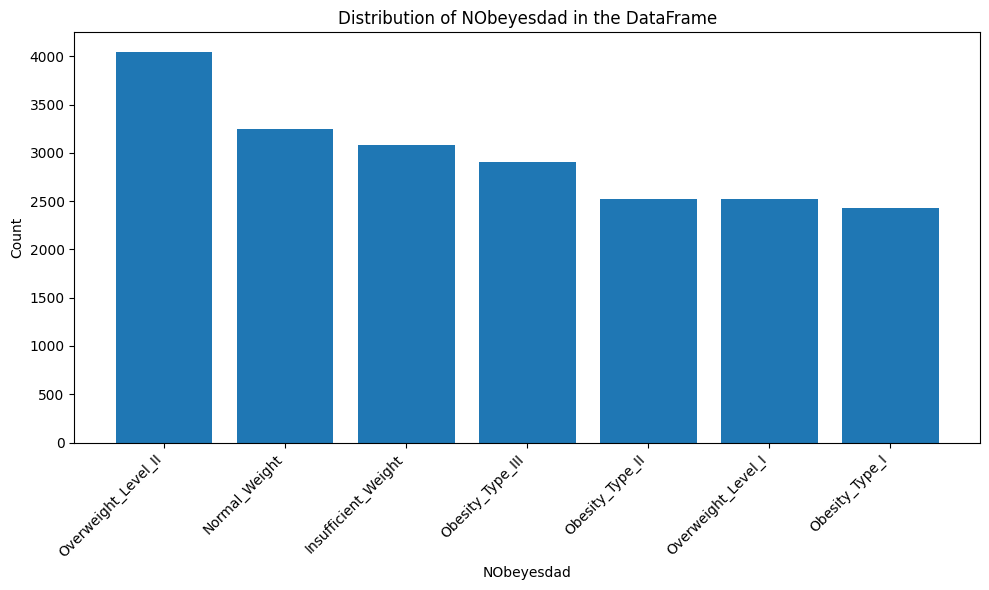

In [10]:
# Get the unique values (classes)
classes = df['NObeyesdad'].unique()

# Create subplots for each class (optional)
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Count occurrences of each class
class_counts = df['NObeyesdad'].value_counts()

# Plot bars for each class (alternative to subplots)
plt.bar(classes, class_counts)

# Customize the plot
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad in the DataFrame')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

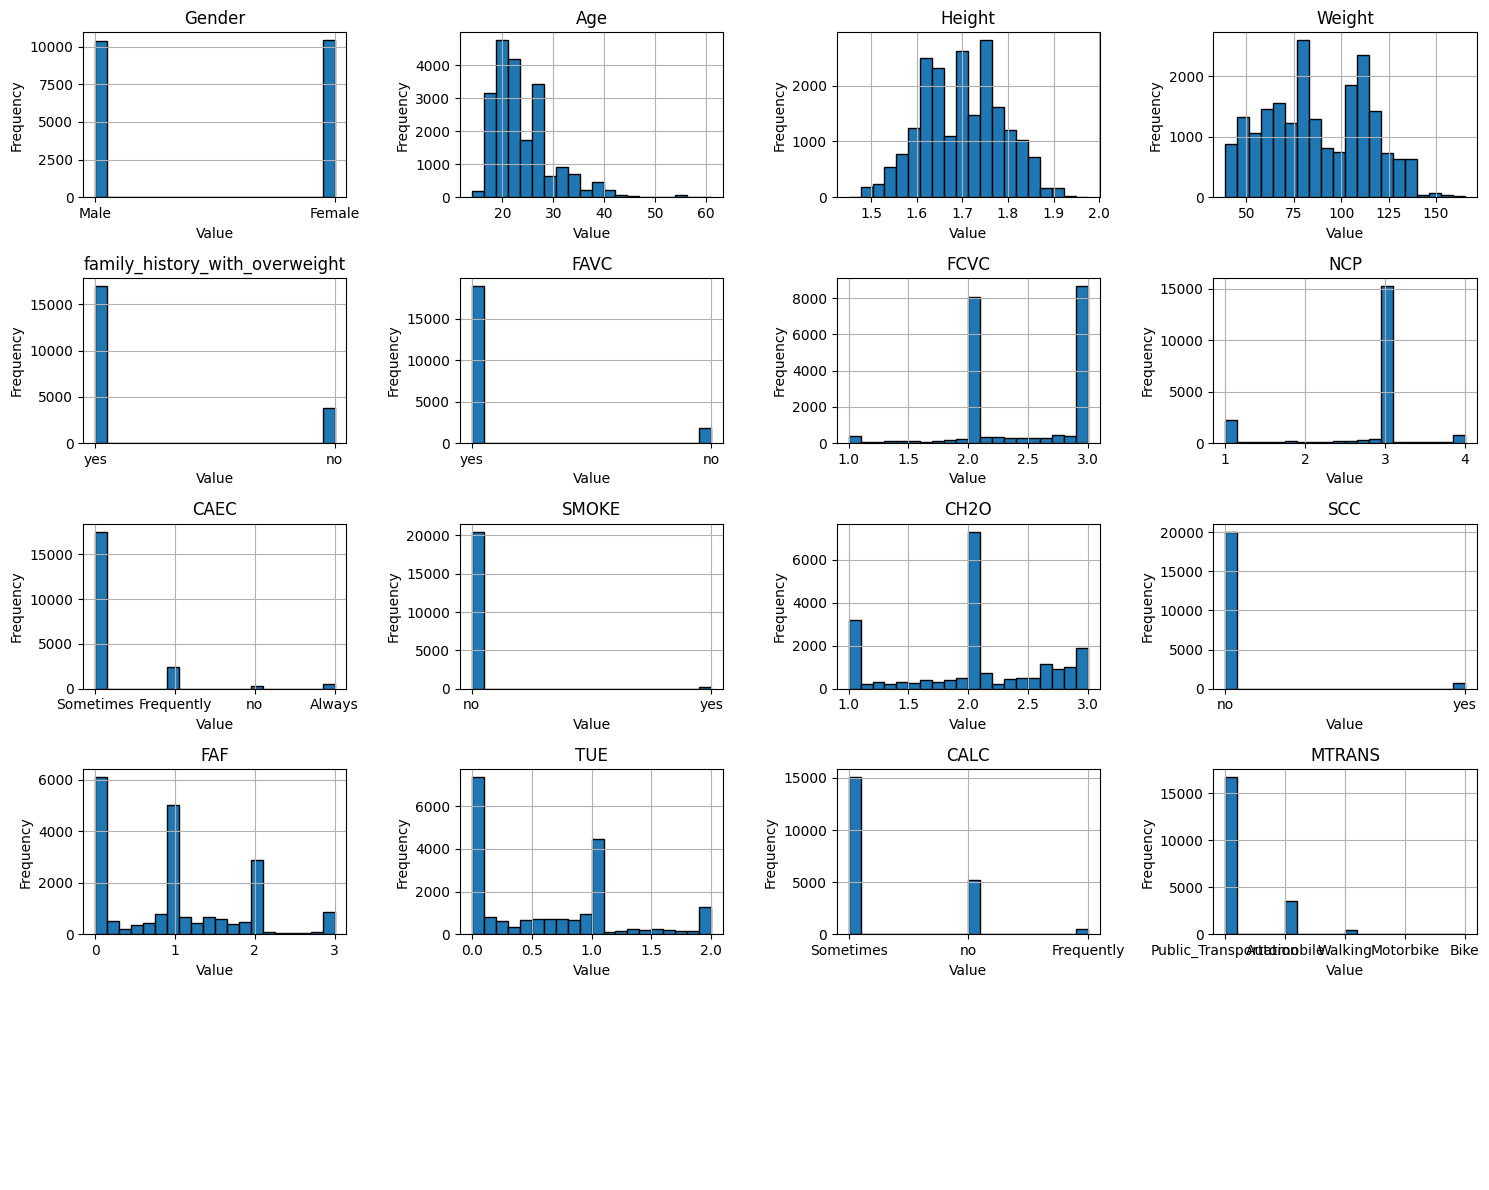

In [11]:
df_eda = df.drop(columns='NObeyesdad')

#Histograms
# Define the dimensions of the subplot grid
num_rows = 5
num_cols = 4

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

# Loop through each column in the DataFrame
for i, column in enumerate(df_eda.columns):
    # Plot the histogram on the corresponding axis
    axs[i].hist(df[column], bins=20, edgecolor='black')
    axs[i].set_title(f'{column}', fontsize=12)
    axs[i].set_xlabel('Value', fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)
    axs[i].grid(True)

# Hide empty subplots
for j in range(len(df_eda.columns), num_rows * num_cols):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
def plot_boxplots(df_eda, grid_shape=(2, 2)):
  """
  Plots boxplots for each numerical column in the DataFrame.

  Args:
      df_eda: pandas DataFrame containing the data.
      grid_shape: A tuple specifying the grid format for the subplots.
  """
  fig, axs = plt.subplots(grid_shape[0], grid_shape[1],figsize=(15, 12))
  axs_flat = axs.flatten()

  # Loop through columns and plot boxplots
  for i, column in enumerate(df_eda.select_dtypes(include=[np.number])):
    axs_flat[i].boxplot(df_eda[column])
    axs_flat[i].set_title(f"{column}", fontsize=12)
    axs_flat[i].set_xlabel("Value", fontsize=10)
    axs_flat[i].set_ylabel("Frequency", fontsize=10)
    axs_flat[i].grid(True)

  # Handle empty subplots (if any)
  for j in range(len(axs_flat), len(axs.flatten())):
    axs_flat[j].axis("off")

  plt.tight_layout()
  plt.show()



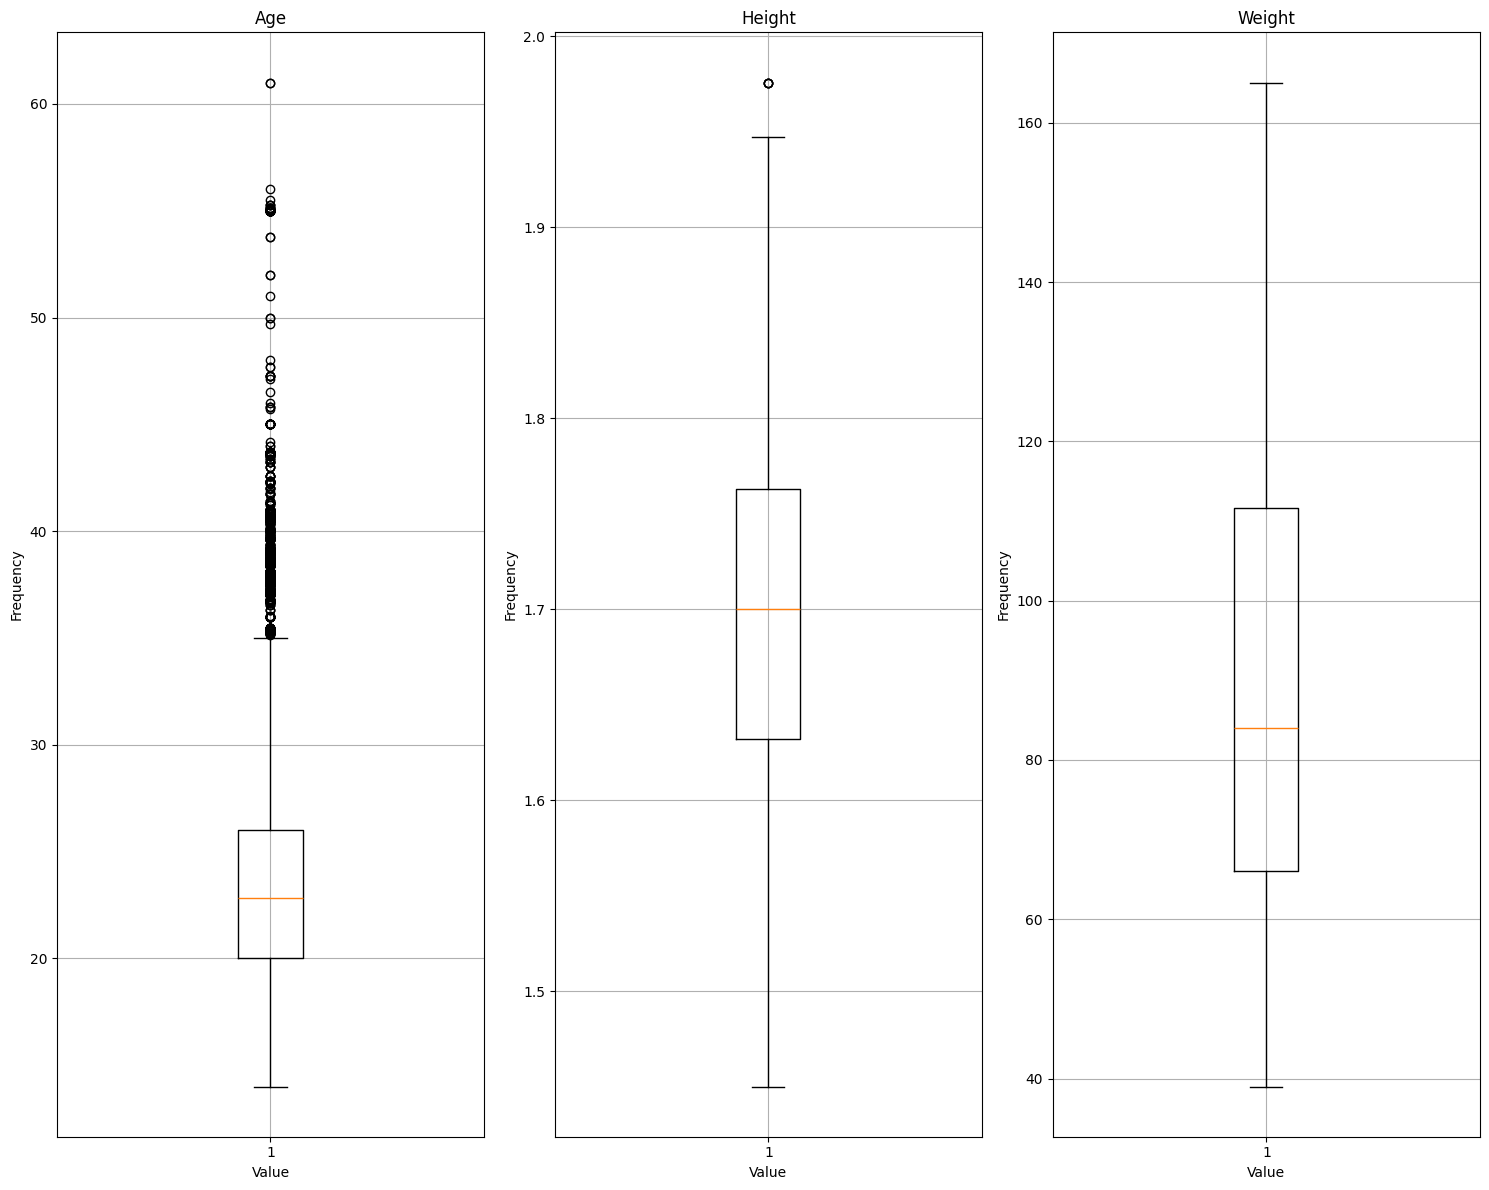

In [13]:
plot_boxplots(df_eda=df_eda[['Age','Height','Weight']], grid_shape=(1,3))

# 5.Feature Engineering

In [14]:
df_categorical = df.select_dtypes(include='object')
df_categorical_columns = list(df_categorical.columns)
df_categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [15]:
# Kiểm tra các giá trị unique của mỗi cột
for col in df_categorical_columns:
    print(f"========\n {col} \n{df_categorical[col].unique()}\n")
    print(df_categorical[col].value_counts())

 Gender 
['Male' 'Female']

Gender
Female    10422
Male      10336
Name: count, dtype: int64
 family_history_with_overweight 
['yes' 'no']

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
 FAVC 
['yes' 'no']

FAVC
yes    18982
no      1776
Name: count, dtype: int64
 CAEC 
['Sometimes' 'Frequently' 'no' 'Always']

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
 SMOKE 
['no' 'yes']

SMOKE
no     20513
yes      245
Name: count, dtype: int64
 SCC 
['no' 'yes']

SCC
no     20071
yes      687
Name: count, dtype: int64
 CALC 
['Sometimes' 'no' 'Frequently']

CALC
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64
 MTRANS 
['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count,

In [16]:
# encode những giá trị categorical thành 0 1 2 3 ...
encoder = LabelEncoder()
for column in df_categorical_columns:
    df[column] = encoder.fit_transform(df[column])
# Lúc sau có thể inverse các encoded giá trị lại thành biến
# categorical bình thường

In [29]:
df.dtypes

       Gender        Age    Height      Weight  \
0           1  24.443011  1.699998   81.669950   
1           0  18.000000  1.560000   57.000000   
2           0  18.000000  1.711460   50.165754   
3           0  20.952737  1.710730  131.274851   
4           1  31.641081  1.914186   93.798055   
...       ...        ...       ...         ...   
20753       1  25.137087  1.766626  114.187096   
20754       1  18.000000  1.710000   50.000000   
20755       1  20.101026  1.819557  105.580491   
20756       1  33.852953  1.700000   83.520113   
20757       1  26.680376  1.816547  118.134898   

       family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                                   1     1  2.000000  2.983297     2      0   
1                                   1     1  2.000000  3.000000     1      0   
2                                   1     1  1.880534  1.411685     2      0   
3                                   1     1  3.000000  3.000000     2      0   

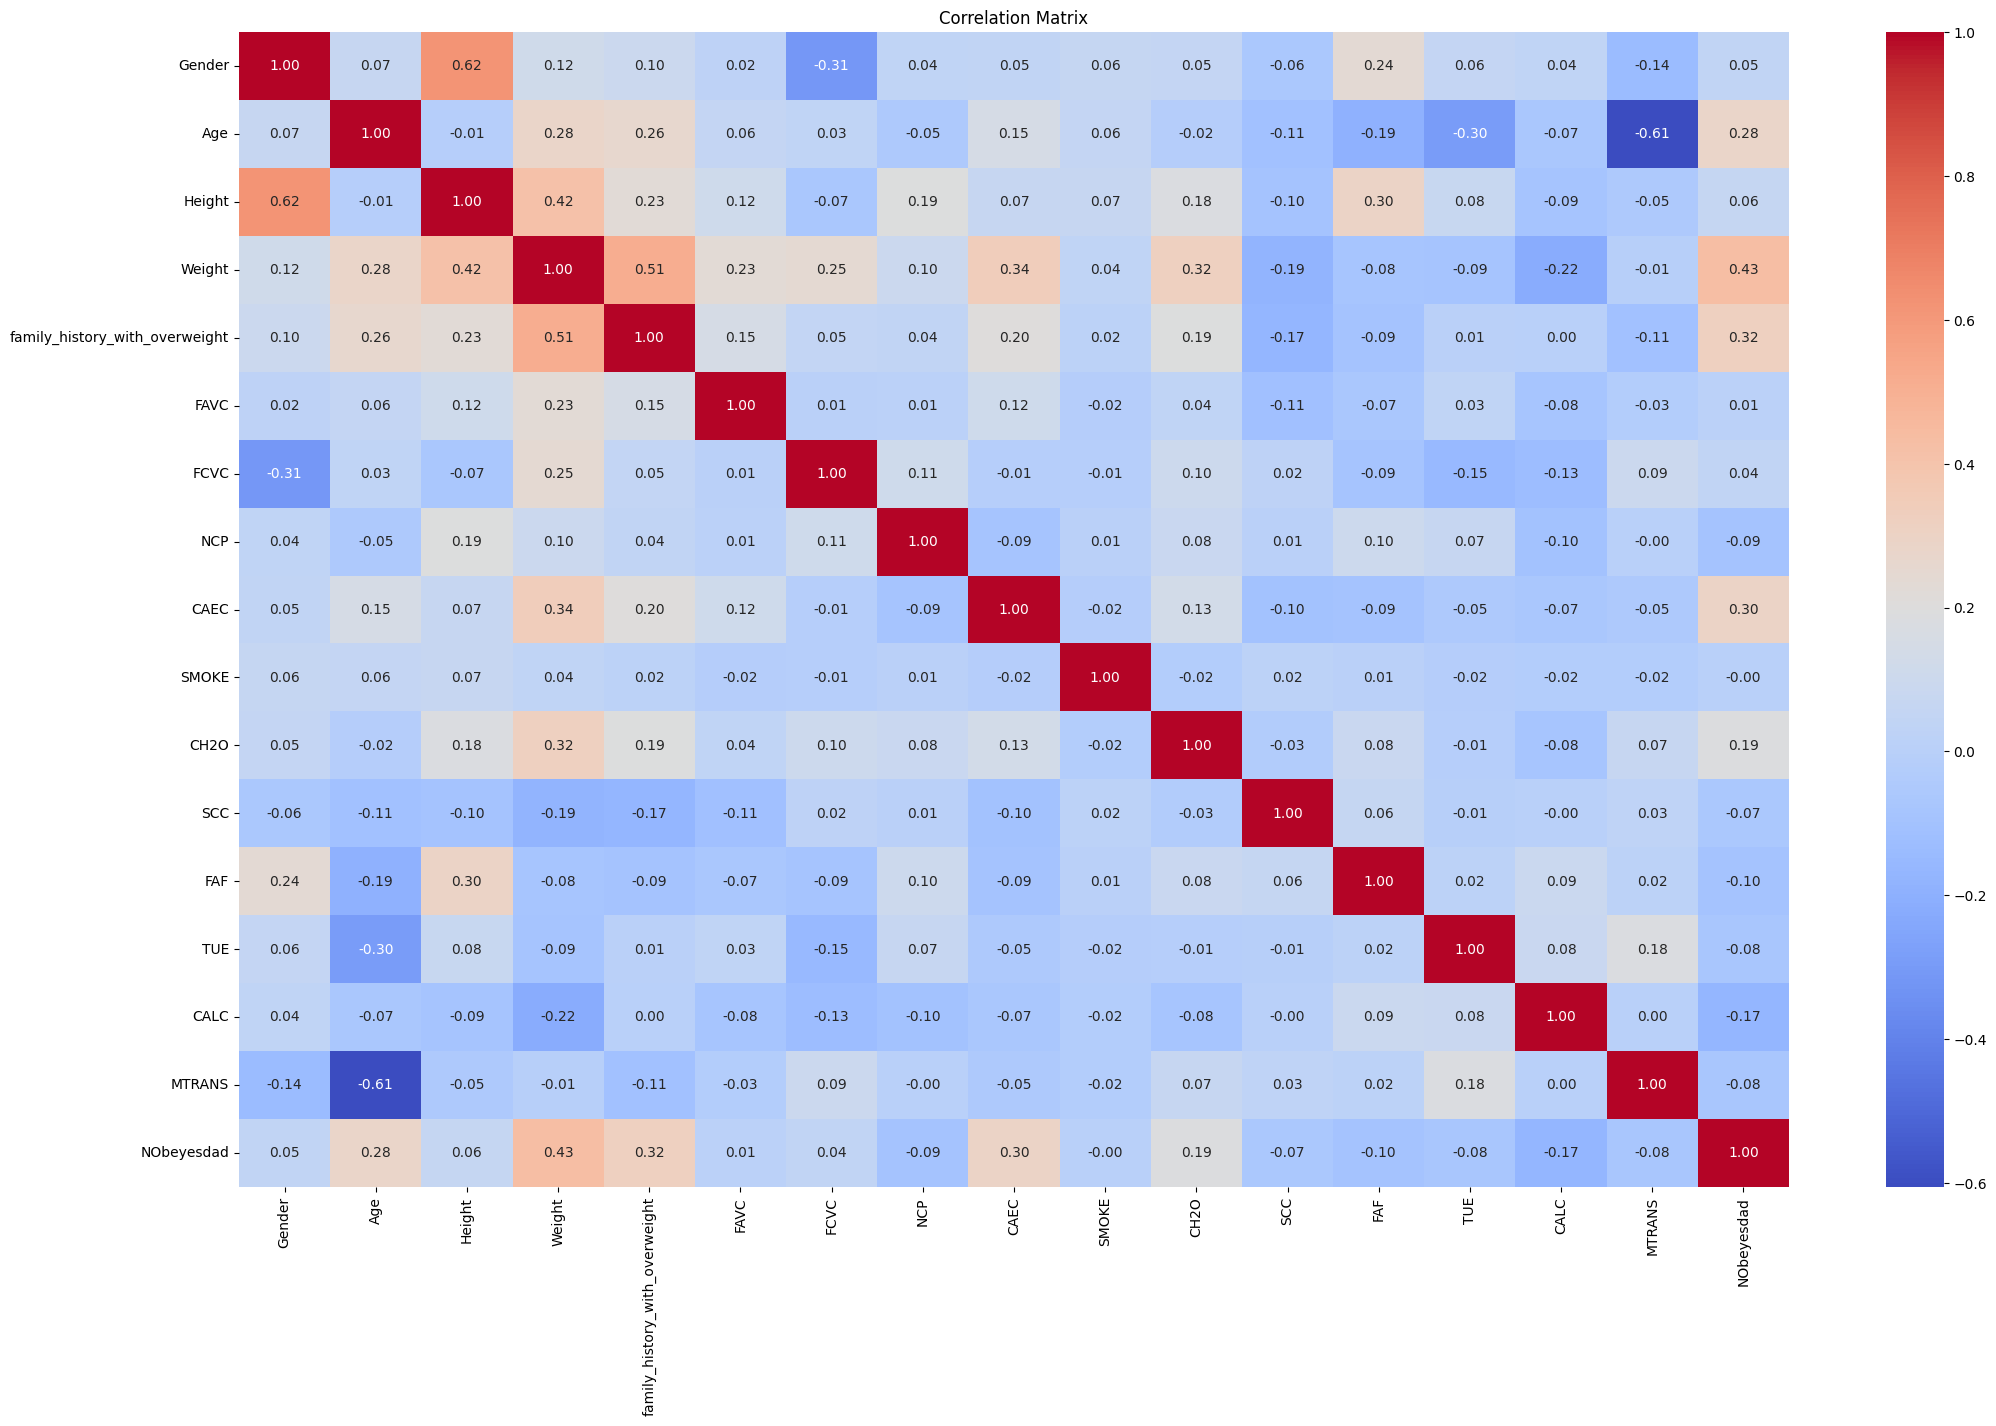

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
# xem lại các giá trị đã được encoded
for col in df_categorical_columns:
    print(f"========\n {col} \n{df[col].unique()}\n")
    print(df[col].value_counts())

 Gender 
[1 0]

Gender
0    10422
1    10336
Name: count, dtype: int64
 family_history_with_overweight 
[1 0]

family_history_with_overweight
1    17014
0     3744
Name: count, dtype: int64
 FAVC 
[1 0]

FAVC
1    18982
0     1776
Name: count, dtype: int64
 CAEC 
[2 1 3 0]

CAEC
2    17529
1     2472
0      478
3      279
Name: count, dtype: int64
 SMOKE 
[0 1]

SMOKE
0    20513
1      245
Name: count, dtype: int64
 SCC 
[0 1]

SCC
0    20071
1      687
Name: count, dtype: int64
 CALC 
[1 2 0]

CALC
1    15066
2     5163
0      529
Name: count, dtype: int64
 MTRANS 
[3 0 4 2 1]

MTRANS
3    16687
0     3534
4      467
2       38
1       32
Name: count, dtype: int64
 NObeyesdad 
[6 1 0 4 3 5 2]

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64


# 6.Train-test split

In [20]:
y = df['NObeyesdad']
X = df.drop(columns='NObeyesdad')

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7) # train_test_split trả về 4 giá tập, gán nó vào 4 biến kia

In [21]:
print(X.shape)
print(X_train.shape)

(20758, 16)
(14530, 16)


# 7.Apply Model

Sử dụng các model sau:

- Logistic Regression
- Decision Tree
- KNN
- SVM
- RandomForest
- XGBoost
- Adaboost


## Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       722
           1       0.65      0.63      0.64       935
           2       0.61      0.69      0.65       874
           3       0.88      0.97      0.92       953
           4       0.99      1.00      0.99      1222
           5       0.52      0.44      0.48       728
           6       0.53      0.41      0.47       794

    accuracy                           0.75      6228
   macro avg       0.72      0.73      0.72      6228
weighted avg       0.74      0.75      0.74      6228



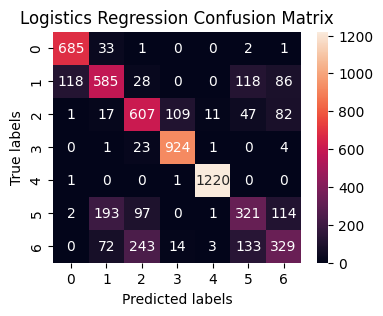

In [22]:
lr = LogisticRegression(C=4, solver='liblinear')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Logistics Regression Confusion Matrix')
plt.show()

## Decision Tree

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       722
           1       0.80      0.78      0.79       935
           2       0.82      0.82      0.82       874
           3       0.94      0.96      0.95       953
           4       0.99      1.00      0.99      1222
           5       0.66      0.67      0.67       728
           6       0.72      0.72      0.72       794

    accuracy                           0.85      6228
   macro avg       0.83      0.83      0.83      6228
weighted avg       0.85      0.85      0.85      6228



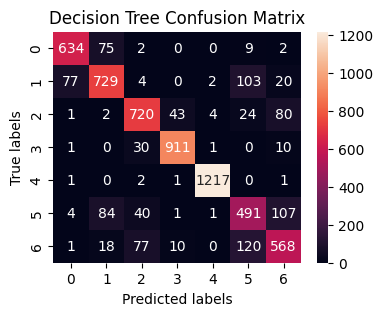

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_dtc)
print(classification_report(y_test, y_pred_dtc))

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## KNN

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       722
           1       0.79      0.75      0.77       935
           2       0.80      0.85      0.82       874
           3       0.96      0.96      0.96       953
           4       0.99      0.99      0.99      1222
           5       0.71      0.68      0.70       728
           6       0.74      0.68      0.71       794

    accuracy                           0.85      6228
   macro avg       0.83      0.83      0.83      6228
weighted avg       0.84      0.85      0.84      6228



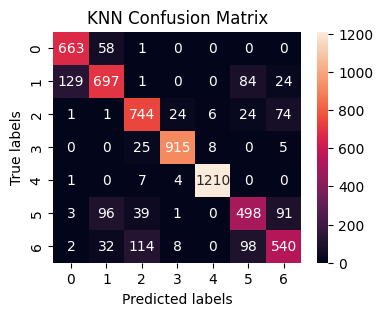

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('KNN Confusion Matrix')
plt.show()

## SVM

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       722
           1       0.79      0.75      0.77       935
           2       0.80      0.85      0.82       874
           3       0.96      0.96      0.96       953
           4       0.99      0.99      0.99      1222
           5       0.71      0.68      0.70       728
           6       0.74      0.68      0.71       794

    accuracy                           0.85      6228
   macro avg       0.83      0.83      0.83      6228
weighted avg       0.84      0.85      0.84      6228



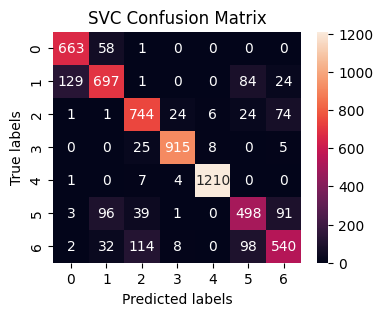

In [25]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('SVC Confusion Matrix')
plt.show()

## Random Forest

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       722
           1       0.85      0.89      0.87       935
           2       0.90      0.89      0.89       874
           3       0.97      0.98      0.97       953
           4       1.00      1.00      1.00      1222
           5       0.81      0.76      0.78       728
           6       0.79      0.81      0.80       794

    accuracy                           0.90      6228
   macro avg       0.89      0.89      0.89      6228
weighted avg       0.90      0.90      0.90      6228



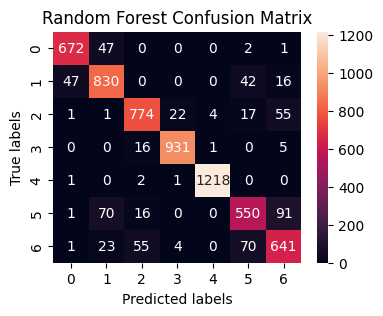

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

## XGBoost

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       722
           1       0.88      0.89      0.88       935
           2       0.89      0.89      0.89       874
           3       0.97      0.98      0.97       953
           4       1.00      1.00      1.00      1222
           5       0.81      0.78      0.79       728
           6       0.81      0.81      0.81       794

    accuracy                           0.91      6228
   macro avg       0.90      0.90      0.90      6228
weighted avg       0.90      0.91      0.90      6228



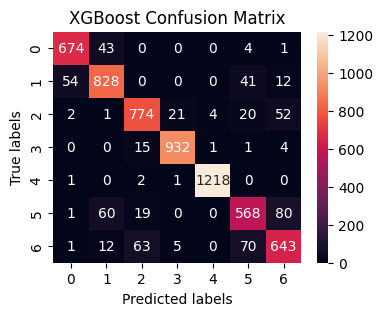

In [27]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('XGBoost Confusion Matrix')
plt.show()

## Adaboost

In [28]:
ada = AdaBoostClassifier(base_estimator = dtc) #Base model: Decision trees
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_ada)
print(classification_report(y_test, y_pred_ada))

# Visualize confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('AdaBoost Confusion Matrix')
plt.show()

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

# 8.Model Evaluation

In [ ]:
# Tổng hợp điểm accuracy của từng mô hình để trình bày
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svc = accuracy_score(y_test, y_pred_svc)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_ada = accuracy_score(y_test, y_pred_ada)

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'KNN', 'SVC', 'Random Forest Classifier','Ada Boost Classifier', 'XGBoost Classifier'],
    'Score' : [acc_lr, acc_dtc, acc_knn, acc_svc, acc_rf, acc_ada, acc_xgb]
})


models = models.sort_values(by = 'Score', ascending = True)
models

,Model,Score
3,SVC,0.696853
0,Logistic Regression,0.762042
5,Ada Boost Classifier,0.840880
1,Decision Tree Classifier,0.849390
2,KNN,0.850996
4,Random Forest Classifier,0.906069
6,XGBoost Classifier,0.910083


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'ggplot2', title = 'Models Comparison')

# 9.Hyper-parameter Tuning

XGBoost

In [ ]:

# Định nghĩa tập các tham số để tìm kiếm
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# In ra tham số tốt nhất
print(f"Best parameters found: {grid_search_xgb.best_params_}")
print(f"Best accuracy: {grid_search_xgb.best_score_}")

# Dự đoán và đánh giá trên tập kiểm tra
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Test accuracy: {acc_xgb}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy: 0.9048177314893833
Test accuracy: 0.9134553628773282


Random Forest

In [ ]:
# Định nghĩa tập các tham số để tìm kiếm
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# In ra tham số tốt nhất
print(f"Best parameters found: {grid_search_rf.best_params_}")
print(f"Best accuracy: {grid_search_rf.best_score_}")

# Dự đoán và đánh giá trên tập kiểm tra
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test accuracy: {acc_rf}")



Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best parameters found: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best accuracy: 0.8947007889173388
Test accuracy: 0.9089595375722543


KNN

In [ ]:
# Định nghĩa tập các tham số để tìm kiếm
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: độ norm L1 (Manhattan), p=2: độ norm L2 (Euclidean)
}

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# In ra tham số tốt nhất
print(f"Best parameters found: {grid_search_knn.best_params_}")
print(f"Best accuracy: {grid_search_knn.best_score_}")

# Dự đoán và đánh giá trên tập kiểm tra
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test accuracy: {acc_knn}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best accuracy: 0.8523059379688757
Test accuracy: 0.8709055876685935


In [ ]:
models = pd.DataFrame({
    'Model' : ['Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier'],
    'Score' : [acc_knn,acc_rf, acc_xgb]
})


models = models.sort_values(by = 'Score', ascending = True)
models

,Model,Score
0,Decision Tree Classifier,0.870906
1,Random Forest Classifier,0.908960
2,XGBoost Classifier,0.913455


# 10.Submission

In [ ]:
id = df_test_data['id']
df_test_data = df_test_data.drop(columns = 'id')


In [ ]:
df_test_categorical = df_test_data.select_dtypes(include='object')
df_test_categorical_columns = list(df_test_categorical.columns)
df_test_categorical_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [ ]:
# encode những giá trị categorical thành 0 1 2 3 ...
encoder = LabelEncoder()
for column in df_test_categorical_columns:
    df_test_data[column] = encoder.fit_transform(df_test_data[column])
# Lúc sau có thể inverse các encoded giá trị lại thành biến
# categorical bình thường

In [ ]:
df_test_data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,0.496749,23.952740,1.698934,87.384504,0.822543,0.909176,2.442898,2.750610,1.843931,0.013006,2.032044,0.033526,0.974532,0.611033,2.228540,2.493931
std,0.500007,5.799814,0.088761,26.111819,0.382068,0.287369,0.531606,0.710927,0.457050,0.113303,0.611230,0.180012,0.840361,0.608005,0.476648,1.156186
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.631662,65.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.771781,0.000000,0.001086,0.000000,2.000000,3.000000
50%,0.000000,22.906342,1.700000,83.952968,1.000000,1.000000,2.358087,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.552498,2.000000,3.000000
75%,1.000000,26.000000,1.760710,111.157811,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.552388,0.000000,1.571865,1.000000,3.000000,3.000000
max,1.000000,61.000000,1.980000,165.057269,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000


In [ ]:
df_test_data.shape

(13840, 16)

In [ ]:
# sử dụng model XGB với các thông số đã hiệu chỉnh
final_y_pred_xgb = best_model_xgb.predict(df_test_data)

# 'best_model_xgb' được định nghĩa ở mục 10.Hyper-parameter Tuning:
# best_model_xgb = grid_search_xgb.best_estimator_

In [ ]:
dic = {'id': id.values,
       'NObeyesdad': final_y_pred_xgb}

submission = pd.DataFrame(dic)
submission.head()

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4


In [ ]:
# đổi từ dữ liệu mã hóa sang đúng dạng
Target = {
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Obesity_Type_I",
    3: "Obesity_Type_II",
    4: "Obesity_Type_III",
    5: "Overweight_Level_I",
    6: "Overweight_Level_II",
}

In [ ]:
# Create a new column named 'Obesity_Category' with mapped values
submission['NObeyesdad'] = submission['NObeyesdad'].map(Target)
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [ ]:
submission.to_csv('submission.csv', index=False)